## Analyzing cardiovascular disease data

In this assignment, you will answer questions about a dataset on cardiovascular disease. You do not need to download the data: it is already in the repository. There are some Tasks that will require you to write code. Complete them and then answer the questions in the form.

#### Problem
- Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results

#### Data description
There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [63]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [64]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
plt.style.use('fivethirtyeight')

In [65]:
df = pd.read_csv('mlbootcamp5_train.csv',sep=';')
df.shape

(70000, 13)

In [66]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [69]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])

In [70]:
df_uniques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490000 entries, 0 to 489999
Data columns (total 2 columns):
variable    490000 non-null object
value       490000 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.5+ MB


In [71]:
df_uniques.head()

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1


In [72]:
#df_uniques= pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count())

In [73]:
#df_uniques

In [74]:
#df_uniques= pd.DataFrame(df_uniques.groupby(['variable','value'])['value'].count()).sort_index(level=[0,1])
#df_uniques

In [75]:
#df_uniques.tail()

In [76]:
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

In [77]:
df_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


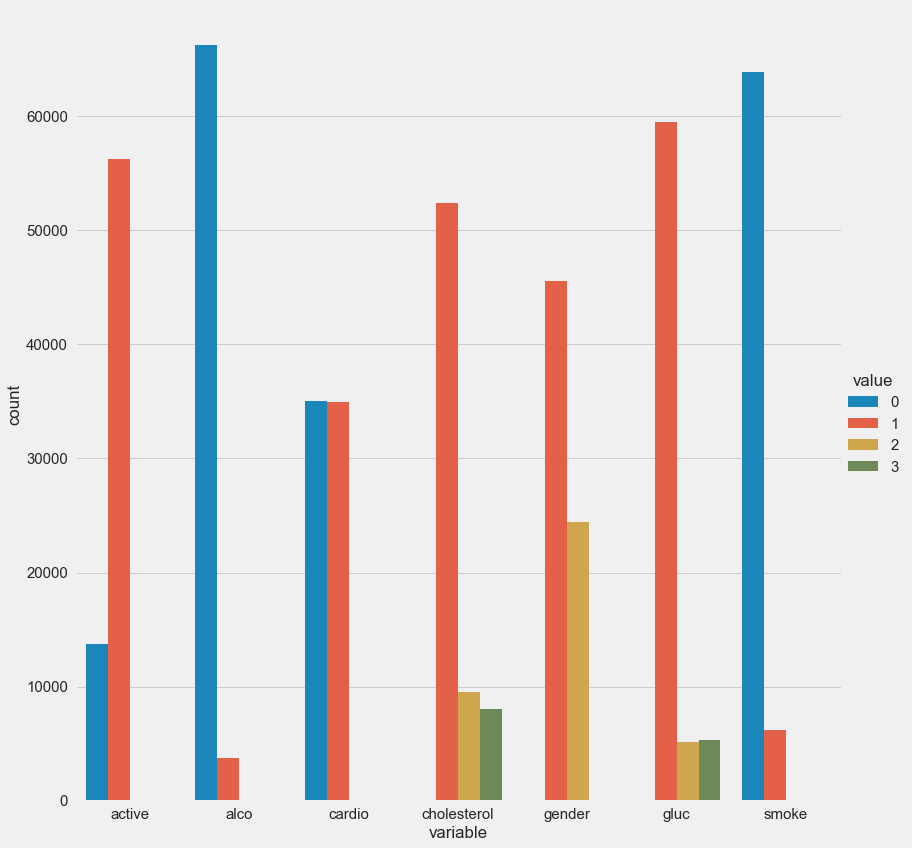

In [78]:
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

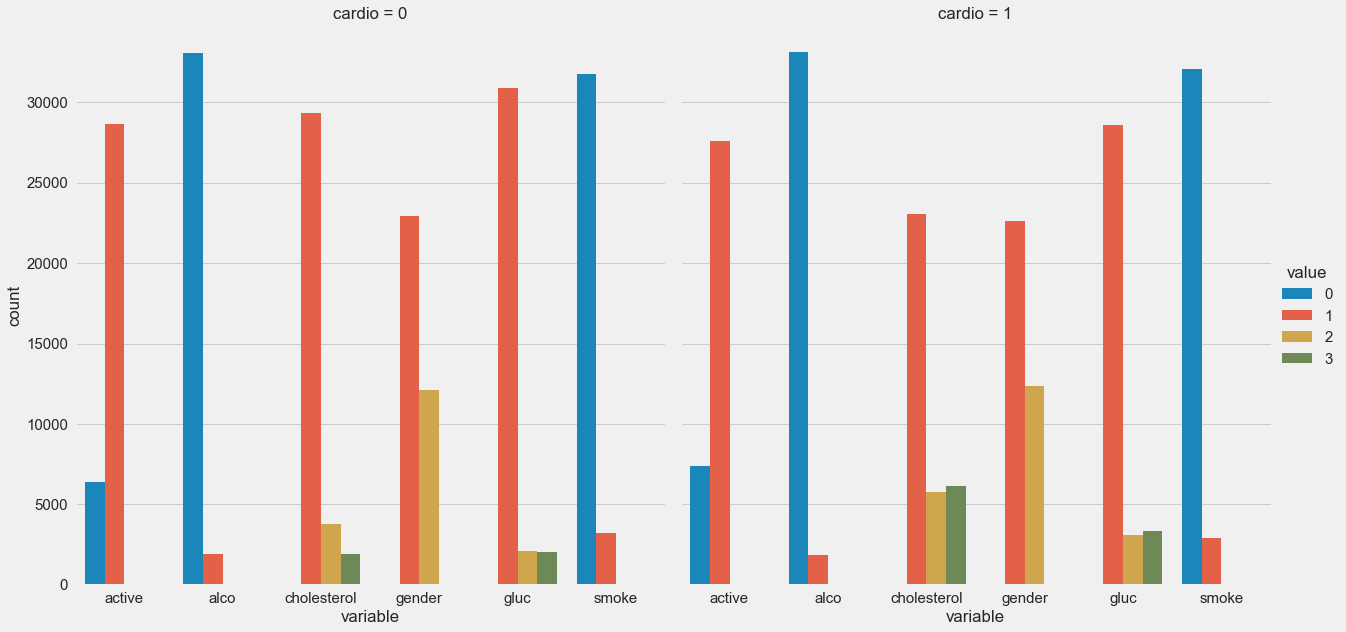

In [79]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

In [80]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <=3:
        print(n,sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [81]:
df_sex = df[['gender','height']]
df_sex.head()

,gender,height
0,2,168
1,1,156
2,1,165
3,2,169
4,1,156


In [82]:
df_sex.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [83]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [84]:
df.groupby('gender')['weight'].mean()

gender
1    72.565605
2    77.257307
Name: weight, dtype: float64

### Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?

In [85]:
#just for fun add new column sex
df['Sex'] = df['gender'].apply(lambda x:'male' if x == 2 else 'female')

In [86]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Sex
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,female


In [87]:
df.groupby(['alco','gender'])['gender'].count()

alco  gender
0     1         44369
      2         21867
1     1          1161
      2          2603
Name: gender, dtype: int64

In [88]:
display(df.loc[df['alco'] == 1,'gender'].sum())
display(df.loc[df['alco'] == 0,'gender'].sum())

6367

88103

In [89]:
display(len(df.loc[ (df['alco'] == 1) & (df['gender'] == 1)]))
display(len(df.loc[ (df['alco'] == 1) & (df['gender'] == 2)]))

1161

2603

### Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?

In [90]:
df.groupby(['gender','smoke'])['smoke'].count()

gender  smoke
1       0        44717
        1          813
2       0        19114
        1         5356
Name: smoke, dtype: int64

In [91]:
female = (len(df.loc[(df['Sex'] == 'female') & (df['smoke'] == 1)]) / len(df.loc[df['Sex'] == 'female'])*100)
male = (len(df.loc[(df['Sex'] == 'male') & (df['smoke'] == 1)]) / len(df.loc[df['Sex'] == 'male'])*100)

result = round(abs(female - male))
print(result)


20


### Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.

In [92]:
#years
display(df.age.div(360).head())
#months
display(df.age.div(30).head())

0    51.091667
1    56.188889
2    52.380556
3    48.952778
4    48.538889
Name: age, dtype: float64

0    613.100000
1    674.266667
2    628.566667
3    587.433333
4    582.466667
Name: age, dtype: float64

In [93]:
result = df.groupby('smoke')['age'].agg({'age':'median'}).div(30).reset_index().rename(columns={'smoke':'Smoke','age':'Median Age (months)'})
result

,Smoke,Median Age (months)
0,0,657.4
1,1,637.5


In [94]:
def calc(data):
    diff = round(data.values[0] - data.values[1])
    print("Median age difference for smokers and non smokers is {}".format(diff))
result2 = df.groupby('smoke')['age'].agg({'age':'median'}).div(30).apply(calc)

Median age difference for smokers and non smokers is 20.0


In [95]:
str1 = "Median age fifference between smokers and non-smokers is: "
result2 = df.groupby('smoke')['age'].agg({'age':'median'}).div(30).apply(lambda x:print(str1,round(x[0] - x[1])))

Median age fifference between smokers and non-smokers is:  20.0


### Question 1.5.  See:
- https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/assignments_demo/assignment02_analyzing_cardiovascular_desease_data.ipynb?flush_cache=true

### Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?

In [96]:
#make new age column in years
df['age_years'] = df['age' ].div(360).round().astype('int16')

In [97]:
#get only age range 60 - 64 inclusive,male,cho = 1 and ap_hi < 120
lower_risk = df[((df.age_years >= 60) & (df.age_years <= 64)) & (df.Sex == 'male') & (df.cholesterol == 1) & (df.ap_hi < 120)]
display(lower_risk.shape)

#get risk level of cardio
lower = lower_risk.cardio.value_counts(normalize=True).to_dict()
lower

(348, 15)

{0: 0.6293103448275862, 1: 0.3706896551724138}

In [98]:
#get only age range 60 - 64 inclusive,male,cho = 1 and ap_hi < 120
higher_risk = df[((df.age_years >= 60) & (df.age_years <= 64)) & (df.Sex == 'male') & 
                 (df.cholesterol == 3) & ((df.ap_hi >=160) & (df.ap_hi <=180)) ]
higher_risk.shape
#get risk level of cardio
higher = higher_risk.cardio.value_counts(normalize=True).to_dict()
higher

{1: 0.84375, 0: 0.15625}

In [99]:
higher[1] / lower[1]

2.2761627906976742

### 1.3. Analyzing BMI¶
Task:
Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilogramms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

### Question 1.6. (2 points). Choose the correct statements:
- Median BMI in the sample is within the range of normal BMI values.
- The BMI for women is on average higher than for men.
- Healthy people have, on average, a higher BMI than the people with CVD.
- For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

In [100]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Sex,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,male,51
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,female,56
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,female,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,male,49
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,female,49


In [101]:
df['bmi'] = df.weight / (df.height/100 * df.height/100)
df.bmi.value_counts().head()

23.875115    943
23.437500    651
24.221453    489
25.711662    363
22.038567    358
Name: bmi, dtype: int64

In [102]:
display(df.bmi.median())

26.374068120774975

In [103]:
df.groupby('Sex')['bmi'].mean()

Sex
female    27.987583
male      26.754442
Name: bmi, dtype: float64

In [104]:
#healthy people bmi and no cvd
df[((df.bmi >= 18.5) & (df.bmi <= 25)) & (df.cardio == 0)]['bmi'].mean()

22.895948267869638

In [105]:
#unhelathy people who have cvd
df[~((df.bmi >= 18.5) & (df.bmi <= 25)) & df.cardio == 1]['bmi'].mean()

30.83432523687621

In [106]:
bmi_healthy = ((df.bmi >= 18.5) & (df.bmi <= 25) )

healthy_nondrink_men = df[ bmi_healthy & (df.alco == 0) & (df.Sex == 'male')]['bmi'].mean()
display(healthy_nondrink_men)

healthy_nondrink_women = df[ bmi_healthy & (df.alco == 0) & (df.Sex == 'female')]['bmi'].mean()
display(healthy_nondrink_women)

23.054523143453896

22.99180778307486

## 1.4. Cleaning data
Task:
We can see that the data is not perfect. It contains "dirt" and inaccuracies. We'll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

- diastolic pressure is higher than systolic
- height is strictly more than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
- height is strictly less than 97.5 percentile
- weight is strictly greater than 2.5 percentile
- weight is strictly less than 97.5 percentile

In [107]:
df = pd.read_csv('mlbootcamp5_train.csv',sep=';')
display(df.shape)
display(df.head())

(70000, 13)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [108]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9037


## Part 2. Visual data analysis
### 2.1. Correlation matrix visualization
To understand the features better, you can create a matrix of the correlation coefficients between the features. Use the initial dataset (non-filtered).

### Task:
Plot a correlation matrix using heatmap(). You can create the matrix using the standard pandas tools with the default parameters.

### Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the gender feature?

- Cardio, Cholesterol
- Height, Smoke
- Smoke, Alco
- Height, Weight

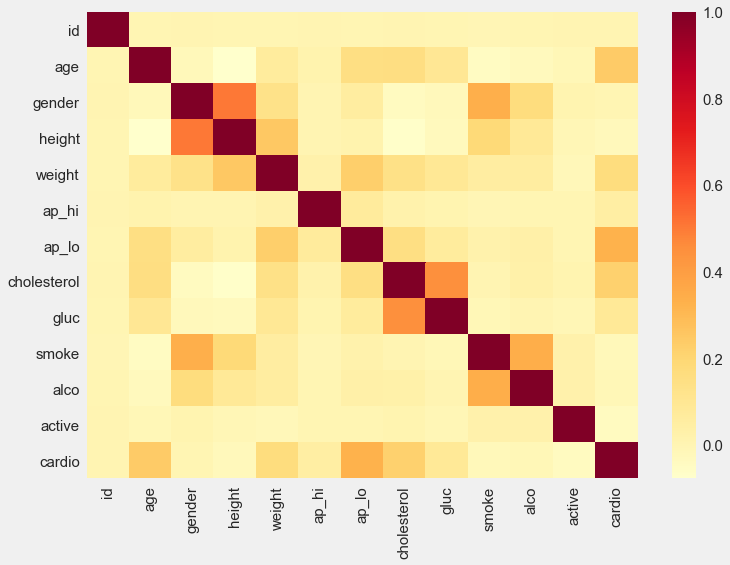

In [109]:
sns.heatmap(filtered_df.corr(),cmap="YlOrRd");

In [110]:
# just correlations between every feature and the response
display(filtered_df.corr(method='pearson')['gender'].abs().sort_values(ascending=False))
corr_dict = filtered_df.corr(method='pearson')['gender'].abs().sort_values(ascending=False)

gender         1.000000
height         0.506447
smoke          0.337855
alco           0.168887
weight         0.130193
ap_lo          0.059743
cholesterol    0.038817
gluc           0.023243
age            0.018320
active         0.007791
ap_hi          0.005063
id             0.003730
cardio         0.002349
Name: gender, dtype: float64

In [111]:
corr_dict['smoke'] + corr_dict['height']

0.8443017072938969

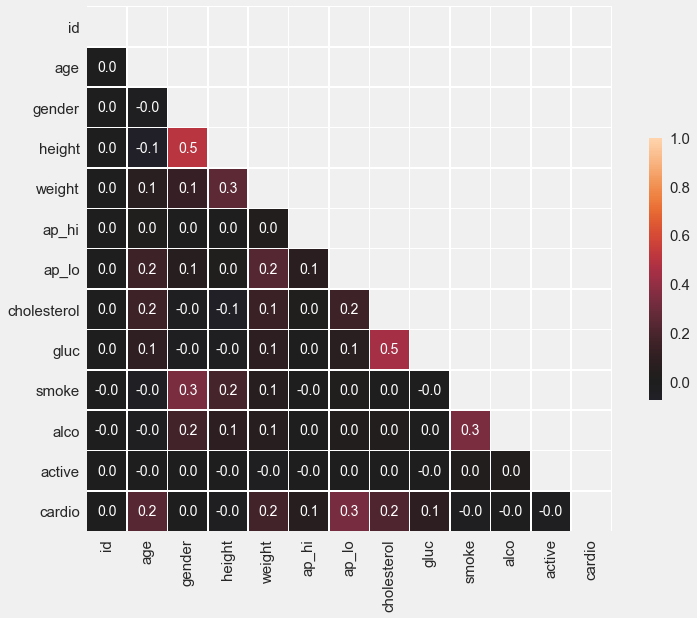

In [112]:
# Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method='pearson')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.2. Height distribution of men and women
From our exploration of the unique values earlier, we know that the gender is encoded by the values 1 and 2. Although you do not know the mapping of these values to gender, you can figure that out graphically by looking at the mean values of height and weight for each value of the gender feature.

### Task:
Create a violin plot for the height and gender using violinplot(). Use the parameters:

- hue to split by gender;
- scale to evaluate the number of records for each gender.
In order for the plot to render correctly, you need to convert your DataFrame to long format using the melt() function from pandas. Here is an example of this for your reference.

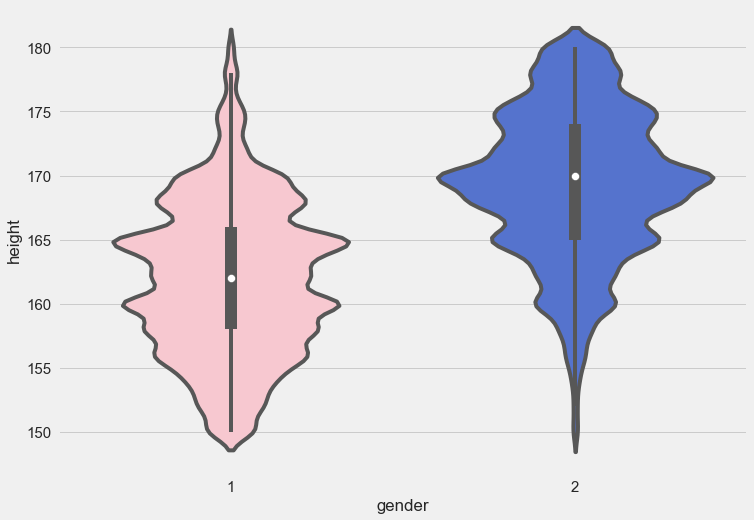

In [113]:
sns.violinplot("gender", "height", data=df,palette=["pink", "royalblue"]);

In [114]:
df_melt = pd.melt(df, value_vars = 'height',id_vars='gender')
df_melt.head(10)

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
5,1,height,151
6,1,height,157
7,2,height,178
8,1,height,158
9,1,height,164


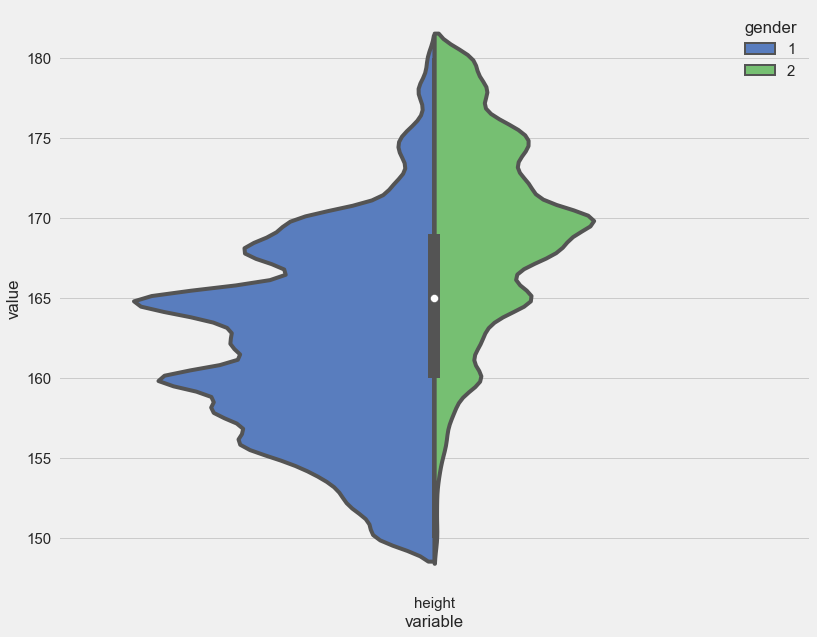

In [115]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

### Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

- Height, Weight
- Age, Weight
- Cholesterol, Gluc
- Cardio, Cholesterol
- Ap_hi, Ap_lo
- Smoke, Alco

In [116]:
import scipy

# Create a function that takes in x's and y's
def spearmans_rank_correlation(xs, ys):
    
    # Calculate the rank of x's
    xranks = xs.rank()
    
    # Caclulate the ranking of the y's
    yranks = ys.rank()
    
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    return scipy.stats.pearsonr(xranks, yranks)

In [117]:
# Run the function
display(spearmans_rank_correlation(df.height, df.weight)[0])
display(spearmans_rank_correlation(df.age, df.weight)[0])
display(spearmans_rank_correlation(df.cardio, df.cholesterol)[0])
display(spearmans_rank_correlation(df.ap_hi, df.ap_lo)[0])
display(spearmans_rank_correlation(df.smoke, df.alco)[0])

0.26253065958215827

0.0703639958912695

0.21281450975507588

0.7362078044226716

0.34120042542324364

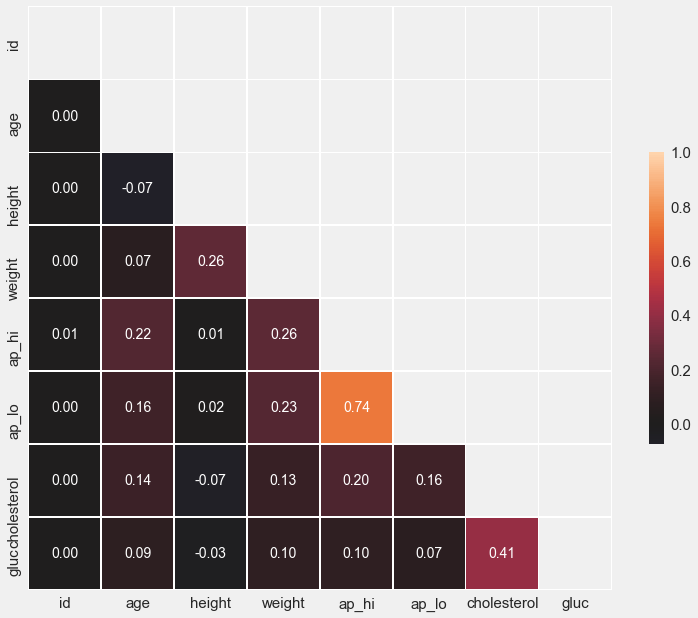

In [118]:
# Calculate the correlation matrix
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.4. Age
Previously, we calculated the age of the respondents in years at the moment of examination.

#### Task:
- Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

In [119]:
df['age_years'] = df['age'].div(360).round().astype('int16')

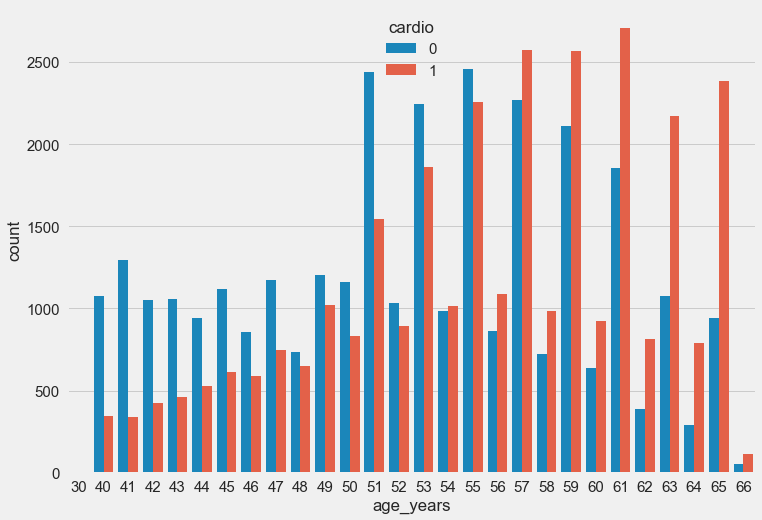

In [120]:
sns.countplot(x='age_years',hue='cardio',data=df);